Importing required libraries to predict acceleration using random forest, calculate RMSE (RootMeanSquaredError), and create plots to compare predicted and actual acceleration

In [44]:
import pandas as pd
import numpy as np
import FileProcessing
import ModelClass

Loading the cleaned ngsim data using pandas

In [45]:
fileProcessing=FileProcessing.FileProcessing()
#model_obj=ModelClass.ModelClass()
#model_obj1=ModelClass.ModelClass()

In [46]:
model_obj=ModelClass.ModelClass()

In [47]:
file_name='Cleaned_NGSIM_Data'
ngsim=fileProcessing.read_input(file_name)

original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


Adding new columns nextframe acceleration, velocity, and position which will be our target features.

In [48]:

#ngsim=model_obj.create_prediction_pair(ngsim,1)
#ngsim=model_obj.create_prediction_pair(ngsim,1)
model_obj.create_prediction_pair(ngsim,1)

,Vehicle_ID,Frame_ID,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Class,v_Vel,...,lane_changes,Prec_Vehicle_ID,previous_Vehicle_Velocity,previous_Vehicle_Acceleration,previous_car_lane_changes,pair_Time_Duration,total_pair_duration,nextframeAcc,nextframesvel,nextframeposition
0,22,37,1118846982600,15.099,34.445,6451138.033,1873346.572,5.02920,2,9.424416,...,False,22,0.0,0.0,False,0.0,41.6,0.000000,9.424416,37.945
1,22,38,1118846982700,15.082,37.945,6451140.385,1873343.980,5.02920,2,9.424416,...,False,22,0.0,0.0,False,0.1,41.6,0.000000,9.424416,41.445
2,22,39,1118846982800,15.063,41.445,6451142.738,1873341.389,5.02920,2,9.424416,...,False,22,0.0,0.0,False,0.2,41.6,0.000000,9.424416,44.446
3,22,40,1118846982900,15.049,44.446,6451144.754,1873339.167,5.02920,2,9.424416,...,False,22,0.0,0.0,False,0.3,41.6,0.000000,9.424416,47.946
4,22,41,1118846983000,15.030,47.946,6451147.107,1873336.576,5.02920,2,9.424416,...,False,22,0.0,0.0,False,0.4,41.6,-2.511552,9.424416,50.952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444316,2486,11094,1113438674300,18.097,1605.419,6042625.418,2134660.086,4.96824,2,1.740408,...,False,2486,0.0,0.0,False,168.9,169.3,1.432560,1.798320,1605.960
444317,2486,11095,1113438674400,18.100,1605.960,6042625.342,2134660.579,4.96824,2,1.798320,...,False,2486,0.0,0.0,False,169.0,169.3,0.862584,1.889760,1606.582
444318,2486,11096,1113438674500,18.104,1606.582,6042625.243,2134661.224,4.96824,2,1.889760,...,False,2486,0.0,0.0,False,169.1,169.3,-0.871728,1.889760,1607.253
444319,2486,11097,1113438674600,18.109,1607.253,6042625.137,2134661.914,4.96824,2,1.889760,...,False,2486,0.0,0.0,False,169.2,169.3,-1.341120,1.804416,1607.873


In [49]:
ngsim["Vehicle_combination_cat"] = ngsim["Vehicle_combination"].astype("category").cat.codes
ngsim["Preceding_Vehicle_Class_cat"]=ngsim["Preceding_Vehicle_Class"].astype("category").cat.codes
ngsim["Location_cat"]=ngsim["Location"].astype("category").cat.codes
                                          

Spliting data into 70% training and 30% testing

In [50]:
train_df, test_df=model_obj.test_train_pairs(ngsim,0.7,2100)

In [51]:
drop_columns_list=['Vehicle_ID','Frame_ID','Global_Time','Local_X','Global_X','Global_Y','v_length','Lane_ID','Preceding','Space_Headway','Time_Headway','v_Class_Name','lane_changes','previous_car_lane_changes','Prec_Vehicle_ID','Vehicle_combination','Preceding_Vehicle_Class','Location']

In [52]:
train_df=train_df.drop(drop_columns_list,axis=1,errors='ignore')
test_df=test_df.drop(drop_columns_list,axis=1,errors='ignore')

In [53]:
print(train_df.isnull().sum())

Local_Y                                        0
v_Class                                        0
v_Vel                                          0
v_Acc                                          0
Rear_to_Front_Space_Headway                    0
Front_To_Rear_Time_Headway                     0
Velocity Difference_Following-Preceding        0
Acceleration Difference_Following-Preceding    0
L-F_Pair                                       0
Relative_Time                                  0
preceding_vehicle_length                       0
previous_Vehicle_Velocity                      0
previous_Vehicle_Acceleration                  0
pair_Time_Duration                             0
total_pair_duration                            0
nextframeAcc                                   0
nextframesvel                                  0
nextframeposition                              0
Vehicle_combination_cat                        0
Preceding_Vehicle_Class_cat                    0
Location_cat        

In [54]:
train_df.dtypes

Local_Y                                        float64
v_Class                                          int64
v_Vel                                          float64
v_Acc                                          float64
Rear_to_Front_Space_Headway                    float64
Front_To_Rear_Time_Headway                     float64
Velocity Difference_Following-Preceding        float64
Acceleration Difference_Following-Preceding    float64
L-F_Pair                                        object
Relative_Time                                    int64
preceding_vehicle_length                       float64
previous_Vehicle_Velocity                      float64
previous_Vehicle_Acceleration                  float64
pair_Time_Duration                             float64
total_pair_duration                            float64
nextframeAcc                                   float64
nextframesvel                                  float64
nextframeposition                              float64
Vehicle_co

In [55]:
print(test_df.isnull().sum())

Local_Y                                        0
v_Class                                        0
v_Vel                                          0
v_Acc                                          0
Rear_to_Front_Space_Headway                    0
Front_To_Rear_Time_Headway                     0
Velocity Difference_Following-Preceding        0
Acceleration Difference_Following-Preceding    0
L-F_Pair                                       0
Relative_Time                                  0
preceding_vehicle_length                       0
previous_Vehicle_Velocity                      0
previous_Vehicle_Acceleration                  0
pair_Time_Duration                             0
total_pair_duration                            0
nextframeAcc                                   0
nextframesvel                                  0
nextframeposition                              0
Vehicle_combination_cat                        0
Preceding_Vehicle_Class_cat                    0
Location_cat        

In [56]:
test_df

,Local_Y,v_Class,v_Vel,v_Acc,Rear_to_Front_Space_Headway,Front_To_Rear_Time_Headway,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,L-F_Pair,Relative_Time,...,previous_Vehicle_Velocity,previous_Vehicle_Acceleration,pair_Time_Duration,total_pair_duration,nextframeAcc,nextframesvel,nextframeposition,Vehicle_combination_cat,Preceding_Vehicle_Class_cat,Location_cat
0,34.445,2,9.424416,0.000000,12.489688,1.325248,9.424416,0.000000,13-22,1117683963501,...,0.000000,0.000000,0.0,41.6,0.000000,9.424416,37.945,0,0,1
1,37.945,2,9.424416,0.000000,12.456160,1.321690,9.424416,0.000000,13-22,1117683963601,...,0.000000,0.000000,0.1,41.6,0.000000,9.424416,41.445,0,0,1
2,41.445,2,9.424416,0.000000,12.431776,1.319103,9.424416,0.000000,13-22,1117683963701,...,0.000000,0.000000,0.2,41.6,0.000000,9.424416,44.446,0,0,1
3,44.446,2,9.424416,0.000000,12.578080,1.334627,9.424416,0.000000,13-22,1117683963801,...,0.000000,0.000000,0.3,41.6,0.000000,9.424416,47.946,0,0,1
4,47.946,2,9.424416,0.000000,12.584176,1.335274,9.424416,0.000000,13-22,1117683963901,...,0.000000,0.000000,0.4,41.6,-2.511552,9.424416,50.952,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443695,1545.483,2,10.189464,0.710184,19.770344,1.940273,2.453640,-0.697992,2469-2472,1112275593601,...,7.735824,1.408176,37.4,37.8,-0.094488,10.232136,1548.859,0,0,0
443697,1548.859,2,10.232136,-0.094488,19.913600,1.946182,2.203704,-3.508248,2469-2472,1112275593701,...,8.028432,3.413760,37.5,37.8,-0.054864,10.226040,1552.214,0,0,0
443700,1552.214,2,10.226040,-0.054864,20.056856,1.961351,1.667256,-3.468624,2469-2472,1112275593801,...,8.558784,3.413760,37.6,37.8,0.000000,10.219944,1555.566,0,0,0
443701,1555.566,2,10.219944,0.000000,20.102576,1.966995,0.941832,-3.413760,2469-2472,1112275593901,...,9.278112,3.413760,37.7,37.8,0.000000,10.222992,1558.919,0,0,0


In [57]:
train_df["Front_To_Rear_Time_Headway"] = train_df["Front_To_Rear_Time_Headway"].replace(np.inf, 999)
train_df[train_df.select_dtypes(np.float64).columns]=train_df.select_dtypes(np.float64).astype(np.float32)

In [58]:
train_df.dtypes

Local_Y                                        float32
v_Class                                          int64
v_Vel                                          float32
v_Acc                                          float32
Rear_to_Front_Space_Headway                    float32
Front_To_Rear_Time_Headway                     float32
Velocity Difference_Following-Preceding        float32
Acceleration Difference_Following-Preceding    float32
L-F_Pair                                        object
Relative_Time                                    int64
preceding_vehicle_length                       float32
previous_Vehicle_Velocity                      float32
previous_Vehicle_Acceleration                  float32
pair_Time_Duration                             float32
total_pair_duration                            float32
nextframeAcc                                   float32
nextframesvel                                  float32
nextframeposition                              float32
Vehicle_co

In [59]:
#rf,X_train,y_train,X_test,y_test=model_obj.fit_random_forest_model(train_df,test_df,150)
model=model_obj.fit_neural_network(train_df)

AttributeError: 'ModelClass' object has no attribute 'fit_neural_network'

In [ ]:
#len(X_train)

317224

In [ ]:
def data_in_parts(test,rangefrom,rangeto):
    a=test['L-F_Pair'].unique()
    b = a.tolist()
    b = b[rangefrom:rangeto]
    c= len(a)/30
    return c,b 


def prediction(test,b,target_variable,RFReg):
    F_df = []
    r = []
    Q = pd.DataFrame()
# b is the test range
    for i in b:
# Q this is the input data frame
        Q = test[test['L-F_Pair']== i]
        vel=np.zeros(Q.shape[0])
        Vehicle_combination = np.zeros(Q.shape[0])
        Local_Y =  np.zeros(Q.shape[0])
        spacing = np.zeros(Q.shape[0])
        dv = np.zeros(Q.shape[0])

        pred_acc = np.zeros(Q.shape[0])
        
    
        #adding first value of the vehicle
        vel[0]=Q.iloc[0]['v_Vel']
        spacing[0] = Q.iloc[0]['Rear_to_Front_Space_Headway']
        Vehicle_combination[0] = Q.iloc[0]['Vehicle_combination_cat']
        Local_Y[0] =  Q.iloc[0]['Local_Y']
        dv[0] = Q.iloc[0]['Velocity Difference_Following-Preceding']   
            
        pred_acc[0] = Q.iloc[1][target_variable]
     
    

#     #predicting first value of acceleration
            #check here
        pred_acc[1]= rf.predict(np.array([vel[0],Vehicle_combination[0],Local_Y[0],dv[0],spacing[0]]).reshape(1,-1))
            

#     #calculating vel,frspacing,local.y,dv from the predicted acceleration.
            #check here
    
    
        for j in range(2,len(Q)):
#         ########
#         #print(j)
#         ########
            vel[j] = vel[j-1]+(pred_acc[j]*0.1)
            dv[j] = vel[j] - Q.iloc[j]['previous_Vehicle_Velocity']
            #spacing[j] = spacing[j-1]+((vel[j-1]*0.1)+ (0.5*pred_acc[j]*pow(0.1,2)))
            spacing[j] = (vel[j-1]*0.1)+ (0.5*pred_acc[j]*pow(0.1,2))
            Local_Y[j]= Local_Y[j-1]
            Vehicle_combination[j]=Vehicle_combination[j-1]
#         ########
#         ## localy: s = ut + 0.5*a*t^2
#         ########
            
            if j == len(Q)-1:
                break
            pred_acc[j+1] = rf.predict(np.array([Vehicle_combination[j],Local_Y[j],vel[j],dv[j],spacing[j]]).reshape(1, -1))
#         ########
#         #print(pred_acc)
#         ########
        Q['pacc']=pred_acc
        Q['pvel']=vel

        F_df.append(Q)
        result = pd.concat(F_df)
        #r.append(r2_score(Q[target_variable], Q['pacc']))
        
    return result


In [ ]:
b =model_obj.prediction_pairs(test_df,100,120)
print(b)


#Predicted acceleration
target_variable = 'nextframeAcc'
F = prediction(test_df, b, target_variable, rf)

['2871-2876', '2856-2862', '2880-2894', '2872-2878', '2879-2886', '2875-2892', '2891-2901', '2895-2900', '2901-2912', '2928-2938', '2900-2906', '2925-2930', '2923-2942', '2964-2971', '2932-2941', '2945-2950', '2946-2959', '2958-2961', '2996-3007', '2974-2979']


c:\Users\StudentAccount\anaconda\envs\Project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\StudentAccount\anaconda\envs\Project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\StudentAccount\anaconda\envs\Project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\StudentAccount\anaconda\envs\Project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\StudentAccount\anaconda\envs\Project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fit

In [ ]:
F1 = F[F["L-F_Pair"]=="2055-2059"]

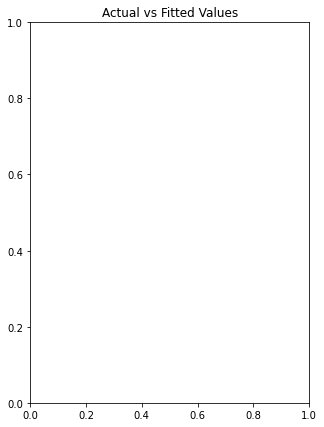

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 7))


ax = sns.lineplot(x=F1["pair_Time_Duration"], y = F1["nextframeAcc"], color="r", label="Actual Value")
sns.lineplot(x=F1["pair_Time_Duration"], y =F1["pacc"],  color="b", label="Fitted Values" )


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

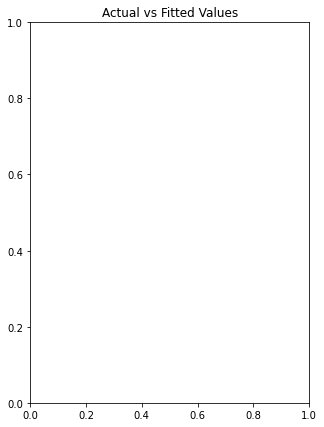

In [ ]:
plt.figure(figsize=(5, 7))


ax = sns.lineplot(x=F1["pair_Time_Duration"], y = F1["nextframeAcc"], color="r", label="Actual Value")
sns.lineplot(x=F1["pair_Time_Duration"], y =F1["pacc"],  color="b", label="Fitted Values" )


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
ngsim.columns

Index(['Vehicle_ID', 'Frame_ID', 'Global_Time', 'Local_X', 'Local_Y',
       'Global_X', 'Global_Y', 'v_length', 'v_Class', 'v_Vel', 'v_Acc',
       'Lane_ID', 'Preceding', 'Space_Headway', 'Time_Headway', 'Location',
       'Preceding_Vehicle_Class', 'Rear_to_Front_Space_Headway',
       'Front_To_Rear_Time_Headway', 'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'L-F_Pair',
       'v_Class_Name', 'Relative_Time', 'Vehicle_combination',
       'preceding_vehicle_length', 'lane_changes', 'Prec_Vehicle_ID',
       'previous_Vehicle_Velocity', 'previous_Vehicle_Acceleration',
       'previous_car_lane_changes', 'pair_Time_Duration',
       'total_pair_duration', 'nextframeAcc', 'nextframesvel',
       'nextframeposition', 'Vehicle_combination_cat',
       'Preceding_Vehicle_Class_cat', 'Location_cat'],
      dtype='object')